# Some calculations for foveated VR display
## MHChoi, Feb. 06, 2023


For RCP light, image is located at -3010.2653157913937mm when distance between BS surface and SLM is 15.739999999999997mm, 
Magnification for display is -69.6176067481821
For LCP light, image is located at -3000.7890273777275mm when distance between BS surface and SLM is 194.92mm, 
Magnification for display is -13.491543149796454
FoV for RCP light with 2inch display = 61.0794106928768 degrees
FoV for LCP light with 2inch display = 9.373122671173466 degrees
FoV for RCP light with 1inch display = 32.871002915983155 degrees
FoV for LCP light with 1inch display = 4.694413409197969 degrees


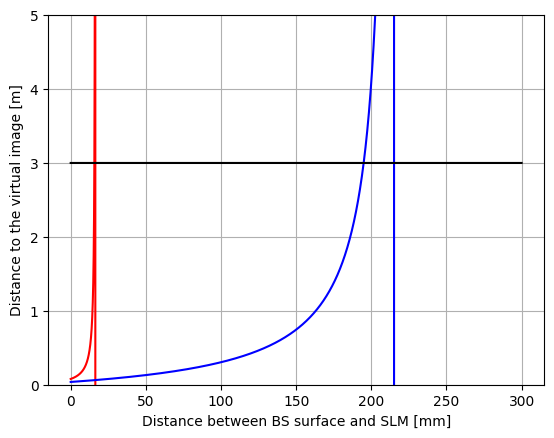

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

    
# refer 20230203_progress_report_최명호.pptx

# Parameters
nm, um, mm, cm, inch = (1e-9, 1e-6, 1e-3, 1e-2, 25.4/1000)
f_GPL_RCP = 100*mm # 550nm에서. 520nm짜리 쓰면 105가 되어버림. 450nm에서는 121!!!
f_GPL_LCP = -100*mm
f_EP = 75.6*mm

length_bs = 25*mm
d_GPL = length_bs/2
d_1 = d_GPL + np.linspace(0,30*cm, 30001)
d_EP = 5*mm

i_GPL_RCP = f_GPL_RCP * (d_1+d_GPL) / ((d_1+d_GPL)-f_GPL_RCP)
o_prime_RCP = d_EP - i_GPL_RCP
i_EP_RCP = o_prime_RCP * f_EP / (o_prime_RCP - f_EP)

i_GPL_LCP = f_GPL_LCP * (d_1+d_GPL) / ((d_1+d_GPL)-f_GPL_LCP)
o_prime_LCP = d_EP - i_GPL_LCP
i_EP_LCP = o_prime_LCP * f_EP / (o_prime_LCP - f_EP)


plt.figure()
plt.plot((d_1-d_GPL) / mm, -i_EP_RCP, 'r')
plt.plot((d_1-d_GPL) / mm, -i_EP_LCP, 'b')
plt.plot((d_1-d_GPL) / mm, 3*np.ones_like(i_EP_LCP), 'k')
plt.xlabel('Distance between BS surface and SLM [mm]')
plt.ylabel('Distance to the virtual image [m]')
plt.ylim([0, 5])
plt.grid()

idx_RCP, dist_RCP = find_nearest(i_EP_RCP, -3)
idx_LCP, dist_LCP = find_nearest(i_EP_LCP, -3)


print('For RCP light, image is located at {}mm when distance between BS surface and SLM is {}mm, \nMagnification for display is {}'.format(dist_RCP/mm, (d_1-d_GPL)[idx_RCP]/mm, dist_RCP/(d_1+d_GPL+d_EP/2)[idx_RCP]))
print('For LCP light, image is located at {}mm when distance between BS surface and SLM is {}mm, \nMagnification for display is {}'.format(dist_LCP/mm, (d_1-d_GPL)[idx_LCP]/mm, dist_LCP/(d_1+d_GPL+d_EP/2)[idx_LCP]))


d_disp = 2*inch
print('FoV for RCP light with 2inch display = {} degrees'.format(np.rad2deg(2*np.arctan(d_disp/2*(1/f_EP + 1/f_GPL_RCP)))))
print('FoV for LCP light with 2inch display = {} degrees'.format(np.rad2deg(2*np.arctan(d_disp/2*(1/f_EP + 1/f_GPL_LCP)))))
print('FoV for RCP light with 1inch display = {} degrees'.format(np.rad2deg(2*np.arctan(d_disp/2/2*(1/f_EP + 1/f_GPL_RCP)))))
print('FoV for LCP light with 1inch display = {} degrees'.format(np.rad2deg(2*np.arctan(d_disp/2/2*(1/f_EP + 1/f_GPL_LCP)))))